# Data Analysis with Python

This Notebook details an introductory approach to Data Analysis using python libraries. Analysis carried out includes; data cleansing, basic statistics, derivation of additional columns and visualisation.

The codes and dataset used can be accessed via <a href = "https://github.com/Mr-Malomz/Python-Published-Repo">Link_to_Repo </a>


** Background of Dataset**

Shuperu Cocktails is side hustle by Mr Wande who sells homemade drinks from a stand. Last semester, Shuperu Cocktails sells two flavours of drink (orange and lemon) at two different locations; Beach (Elegushi) and Park (Agege). In order to promote her sales, she involves Branding Ambersadors to distribute leaflets in the local area. The recorded details of Shuperu Cocktails sales and leaflet distribution in a raw file.

 ** 1. Import libraries and Load Dataset **

In [60]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

#The code below loads the dataset
df = pd.read_csv("C:\\Users\\USER\\Desktop\\SAP\\Data Science\\DAT101x_Labfiles\\Lemonade2016.csv", sep =",", header= 0)

**Preview the loaded Data to see structure and type**

In [2]:
df.head() #pulls out first 5 sample of the data

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,7/1/2016,Park,97,67,70,90.0,0.25
1,7/2/2016,Park,98,67,72,90.0,0.25
2,7/3/2016,Park,110,77,71,104.0,0.25
3,7/4/2016,Beach,134,99,76,98.0,0.25
4,7/5/2016,Beach,159,118,78,135.0,0.25


In [3]:
df.dtypes #check data types

Date            object
Location        object
Lemon            int64
Orange           int64
Temperature      int64
Leaflets       float64
Price          float64
dtype: object

Convert Date Column to Datetime format

In [4]:
df.Date = pd.to_datetime(df.Date, format= "%m/%d/%Y") 

In [5]:
#Rerun dtype to see if changes on the dataframe
df.dtypes

Date           datetime64[ns]
Location               object
Lemon                   int64
Orange                  int64
Temperature             int64
Leaflets              float64
Price                 float64
dtype: object

**Check for missing value in each column**

In [6]:
#Since the data is relatively small, we can view the table and see missing value in each column as "True" 
df.isnull()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,True,False,False,False,False,False,False
9,False,False,False,False,False,False,False


From the table above, we have missing values in Date & Leaflets Column. Lets fill in the missing date and missing leaflet value by finding their average

In [7]:
#Filling in the Date Column Missing value
av_date = df.Date[9]
df.Date = df.Date.fillna(av_date)


#Filling in the Leaflets Column Missing value
lf = df.Leaflets.mean()
df.Leaflets = df.Leaflets.fillna(lf)

In [8]:
#Check effected changes and round the leaflet column decimal point to 1
df.Leaflets = df.Leaflets.round(1)
df

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25
5,2016-07-06,Beach,103,69,82,90.0,0.25
6,2016-07-06,Beach,103,69,82,90.0,0.25
7,2016-07-07,Beach,143,101,81,135.0,0.25
8,2016-07-09,Beach,123,86,82,113.0,0.25
9,2016-07-09,Beach,134,95,80,126.0,0.25


** 2. Addition of Calculated Columns **
       


   Sales Column calculates the sum of Lemon and Orange Sales
   
   Revenue Column calculates  the product of Sales and Price

In [9]:
#Sales Column
df["Sales"] = df.Lemon + df.Orange

#Revenue Column
df["Revenue"] = df.Sales * df.Price

In [10]:
#Check effected changes
df

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,2016-07-01,Park,97,67,70,90.0,0.25,164,41.00
1,2016-07-02,Park,98,67,72,90.0,0.25,165,41.25
2,2016-07-03,Park,110,77,71,104.0,0.25,187,46.75
3,2016-07-04,Beach,134,99,76,98.0,0.25,233,58.25
4,2016-07-05,Beach,159,118,78,135.0,0.25,277,69.25
5,2016-07-06,Beach,103,69,82,90.0,0.25,172,43.00
6,2016-07-06,Beach,103,69,82,90.0,0.25,172,43.00
7,2016-07-07,Beach,143,101,81,135.0,0.25,244,61.00
8,2016-07-09,Beach,123,86,82,113.0,0.25,209,52.25
9,2016-07-09,Beach,134,95,80,126.0,0.25,229,57.25


** 3. Basic Statistics on Dataset **

Summary Statistics on Revenue generated from Shuperu Cocktails

In [11]:
df.Revenue.describe()

count     32.000000
mean      68.156250
std       24.645531
min       41.000000
25%       51.500000
50%       58.875000
75%       83.375000
max      134.500000
Name: Revenue, dtype: float64

Total Revenue Generated

In [12]:
df.Revenue.sum()

2181.0000000000005

From the summary statistics above, we can deduce that Shuperu Cocktails average revenue, total revenue, minimum revenue, maximum revenue etc.

Lets check the effect of temperature on the sales.

First we check the top 10 temperature

In [13]:
df.Temperature.nlargest(10)

12    84
25    84
11    83
26    83
5     82
6     82
8     82
10    82
24    82
28    82
Name: Temperature, dtype: int64

Then we calculate the correlation ( -1 & 1 ) to see how related the temperature & leaflets are to the price and sales

In [14]:
#This checks the correlation between Temperature of the day and Price
df['Temperature'].corr(df.Price)

-0.055745296839830212

In [15]:
#This checks the correlation between leaflets shared and Price
df['Leaflets'].corr(df.Price)

0.058967799493871015

In [16]:
#This checks the correlation between Temperature of the day and Sales
df['Temperature'].corr(df.Sales)

0.44772025757558648

In [17]:
#This checks the correlation between Leaflets shared and Sales
df['Leaflets'].corr(df.Sales)

0.84514966800386881

** 3. Visualisation of Datasets **

A  line plot of Revenue and Date  with linear trendline

<IPython.core.display.Javascript object>


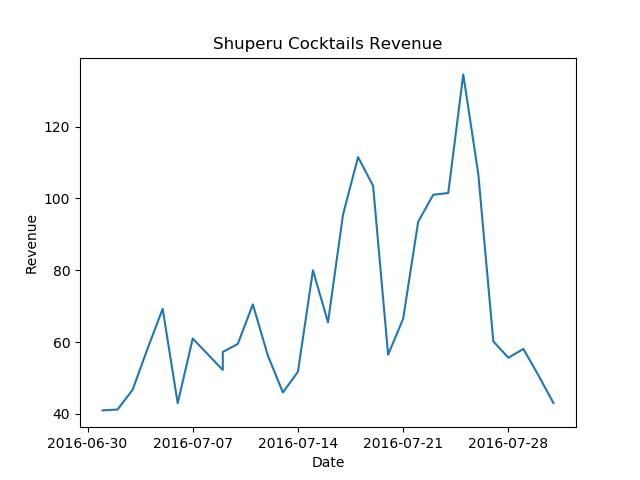

In [24]:
plt.figure(1)
x = df.Date
y = df.Revenue
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Shuperu Cocktails Revenue')
plt.show()







A Scatter-plot to show correlation between Leaflets shared and Sales per day

<IPython.core.display.Javascript object>


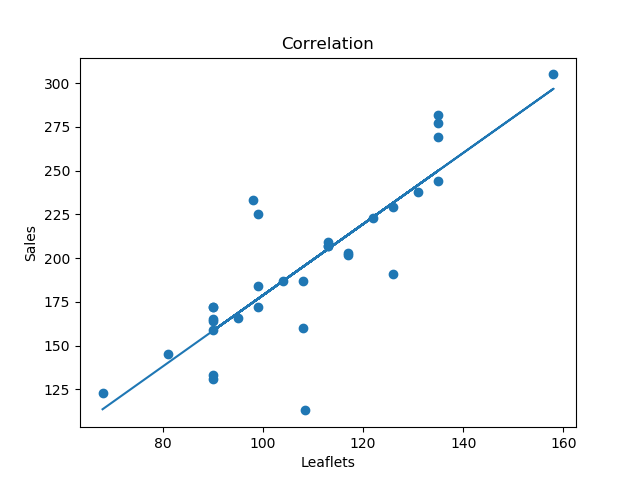

In [27]:
plt.figure(2)
x = df.Leaflets
y = df.Sales
plt.scatter(x, y)
plt.xlabel('Leaflets')
plt.ylabel('Sales')
plt.title('Correlation')
plt.show()

#Treadline
td = np.polyfit(x,y, 1)
treadline = np.poly1d(td)
plt.plot(x, treadline(x))

Histogram to visualize how the revenue of Shuperu Cocktails is distributed over the period

<IPython.core.display.Javascript object>


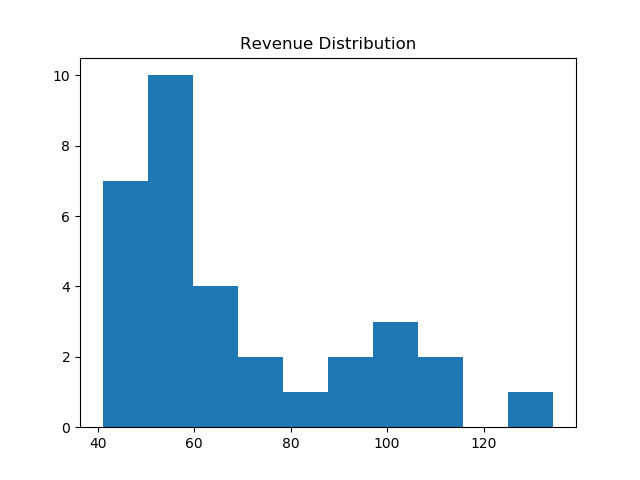

In [31]:
plt.figure(3)
plt.hist(df.Revenue, bins= 10)
plt.title('Revenue Distribution')
plt.show()

BarPlot to compare sales of Lemon and Orange